# HEAD MOVES
### Useful libraries

In [1]:
from pyluos import Robot
from spherical_joint import Actuator
import time
import math
import numpy as np
import threading

/Users/augustin/.virtualenvs/spherical-joint/lib/python3.6/site-packages/quaternion/numba_wrapper.py:20: UserWarning: 

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Could not import from numba, which means that some
parts of this code may run MUCH more slowly.  You
may wish to install numba.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

  warnings.warn(warning_text)


### Parameters of the actuator

In [2]:
a = Actuator([0,0,117.4],[0,0,84.256],51.56)

r = Robot('/dev/cu.usbserial-DN05NM0L')
#r.gate.delay=10
r.disk_bottom.rot_position=False
r.disk_middle.rot_position=False
r.disk_top.rot_position=False

###########Setup############

r.disk_bottom.encoder_res = 5
r.disk_middle.encoder_res = 5
r.disk_top.encoder_res = 5


r.disk_bottom.setToZero()
r.disk_middle.setToZero()
r.disk_top.setToZero()


r.disk_bottom.reduction = 214
r.disk_middle.reduction = 214
r.disk_top.reduction = 214


r.disk_bottom.wheel_size = 79
r.disk_middle.wheel_size = 79
r.disk_top.wheel_size = 79

r.disk_bottom.positionPid = [9,0.06,80]
r.disk_middle.positionPid = [9,0.06,110]
r.disk_top.positionPid = [9,0.02,120]

r.disk_bottom.rot_position_mode(True)
r.disk_middle.rot_position_mode(True)
r.disk_top.rot_position_mode(True)

r.disk_top.rot_position = True
r.disk_middle.rot_position = True
r.disk_bottom.rot_position = True

#If speed must be limited

#r.disk_bottom.rot_speed_mode(True)
#r.disk_middle.rot_speed_mode(True)
#r.disk_top.rot_speed_mode(True)

#r.disk_bottom.target_rot_speed = 9
#r.disk_middle.target_rot_speed = 9
#r.disk_top.target_rot_speed = 9

Connected to "/dev/cu.usbserial-DN05NM0L".
Sending detection signal.
Waiting for route table...
Robot setup.


### Compliant Mode

In [ ]:
r.disk_bottom.compliant = True
r.disk_middle.compliant = True
r.disk_top.compliant = True

In [3]:
r.disk_bottom.compliant = False
r.disk_middle.compliant = False
r.disk_top.compliant = False

### Initial position

In [44]:
r.disk_bottom.target_rot_position = 0
r.disk_middle.target_rot_position = 0
r.disk_top.target_rot_position = 0

In [10]:
q11,q12,q13 = a.get_angles_from_vector([0,0,1],0)
r.disk_top.target_rot_position = q11
r.disk_middle.target_rot_position = q12
r.disk_bottom.target_rot_position = q13

## Demo 1 : Yes/No
1) No

In [4]:
t=0
while t < 5:
    angle=10*math.sin(5*t)
    q11,q12,q13 = a.get_angles_from_vector([0.3,0,1],angle)
    r.disk_top.target_rot_position = q11
    r.disk_middle.target_rot_position = q12
    r.disk_bottom.target_rot_position = q13
    time.sleep(0.01)
    t=t+0.01

2) Yes


In [10]:
t=0
while t < 10:
    angle1=0.5*math.sin(20*t)
    angle2=0.5*math.sin(10*t)
    q11,q12,q13 = a.get_angles_from_vector([angle1,angle2,1],0)
    r.disk_top.target_rot_position = q11
    r.disk_middle.target_rot_position = q12
    r.disk_bottom.target_rot_position = q13
    time.sleep(0.01)
    t=t+0.01

## Demo 2 : Rotation of the platform / Exorcist

In [8]:
q11,q12,q13 = a.get_angles_from_vector([0.8,0,1],0)
r.disk_top.target_rot_position = q11
r.disk_middle.target_rot_position = q12
r.disk_bottom.target_rot_position = q13

time.sleep(1)
angle = 0
for i in range(720):
    angle=i
    time.sleep(0.01)
    q11,q12,q13 = a.get_angles_from_vector([0.8,0,1],angle)
    
    r.disk_top.target_rot_position = q11
    r.disk_middle.target_rot_position = q12
    r.disk_bottom.target_rot_position = q13

time.sleep(1)
q11,q12,q13 = a.get_angles_from_vector([0,0,1],0)
r.disk_bottom.target_rot_position = q11
r.disk_middle.target_rot_position = q12
r.disk_top.target_rot_position = q13

## Demo 3 : Circle

In [7]:
Rtest = 4
centerTest = 10
angle=0
t=0
a.reset_last_angles()
a.reset_offset()

while t<5*2*math.pi: #TEST CIRCLE PARAMETRIC EQUATION:
    locus = np.array([Rtest*math.cos(t),Rtest*math.sin(t),centerTest])
    t=t+math.pi/50
    angle = angle
    
    q11,q12,q13 = a.get_angles_from_vector(locus,angle)
    
    r.disk_top.target_rot_position = q11
    r.disk_middle.target_rot_position = q12
    r.disk_bottom.target_rot_position = q13

    
    time.sleep(0.01)

## Demo 4 : Circle and rotation

In [9]:
Rtest = 4
centerTest = 10
angle=0
t=0

a.reset_last_angles()
a.reset_offset()

while t<2*2*math.pi:
    locus = np.array([Rtest*math.cos(t),Rtest*math.sin(t),centerTest])
    t=t+math.pi/1000
    angle = angle+1
    
    q11,q12,q13 = a.get_angles_from_vector(locus,angle)
    
    r.disk_top.target_rot_position = q11
    r.disk_middle.target_rot_position = q12
    r.disk_bottom.target_rot_position = q13


    time.sleep(0.01)

## Demo 5 : Record and play moves
1) Record and play a pose

In [7]:
pose = [r.disk_top.rot_position,r.disk_middle.rot_position,r.disk_bottom.rot_position]

In [13]:
r.disk_top.target_rot_position = pose[0]
r.disk_middle.target_rot_position = pose[1]
r.disk_bottom.target_rot_position = pose[2]

2) Record a move

In [18]:
r.disk_bottom.compliant = True
r.disk_middle.compliant = True
r.disk_top.compliant = True

Input = []
T = []
t=0
top = []
middle = []
bottom = []

def Listener():
    global Input
    Input = input()
    
listener = threading.Thread(target=Listener)
listener.start()
move = []

while True:
    if type(Input) == type(""):
        break
    else :
        move.append([r.disk_top.rot_position,r.disk_middle.rot_position,r.disk_bottom.rot_position])
        t=t+0.005
        T.append(t)
        top.append(move[-1][0])
        middle.append(move[-1][1])
        bottom.append(move[-1][2])
    time.sleep(0.005)

3) Play a move

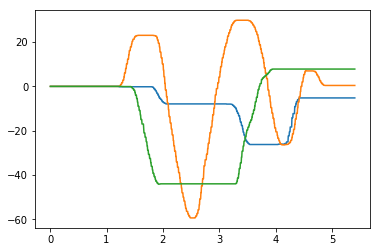

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/augustin/Downloads/pyluos/pyluos/io/serial_io.py", line 83, in _poll
    to_read = self._serial.in_waiting
  File "/Users/augustin/.virtualenvs/spherical-joint/lib/python3.6/site-packages/serial/serialposix.py", line 467, in in_waiting
    s = fcntl.ioctl(self.fd, TIOCINQ, TIOCM_zero_str)
OSError: [Errno 6] Device not configured



In [6]:
from matplotlib import pyplot as plt
plt.plot(T,top, label = 'top')
plt.plot(T,middle, label='middle')
plt.plot(T,bottom, label = 'bottom')

In [4]:
r.disk_bottom.compliant = False
r.disk_middle.compliant = False
r.disk_top.compliant = False

for i in range(len(move)):
    r.disk_top.target_rot_position = move[i][0]
    r.disk_middle.target_rot_position = move[i][1]
    r.disk_bottom.target_rot_position = move[i][2]
    time.sleep(0.005)